In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [34]:
df = pd.read_csv("Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [35]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [36]:
X = df.drop('complication', axis=1).copy().values
Y = df['complication'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [37]:
class Perceptron:
    def __init__(self, input_length, learning_rate):
        self.W = np.random.rand(input_length)
        self.b = np.random.rand(1)
        self.learning_rate = learning_rate
    
    def activation(self, x, function="sigmoid"):
        if function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif function == "relu":
            return np.maximum(0, x)
        elif function == "tanh":
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        else:
            raise Exception("Not supported activation function")

    def forward(self, x):
        return self.activation(x @ self.W + self.b)
    
    def back_propagation(self, x_train, y_train, y_pred):
        dW = (y_pred - y_train) * x_train
        db = (y_pred - y_train)
        return dW, db
    
    def update(self, dW, db):
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def fit(self, X_train, Y_train, epochs):
        for epoch in tqdm(range(epochs)):
            for x_train, y_train in zip(X_train, Y_train):
                y_pred = self.forward(x_train)
                dW, db = self.back_propagation(x_train, y_train, y_pred)
                self.update(dW, db)

    def predict(self, X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = self.forward(x_test)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def calc_loss(self, X_test, Y_test, metric='mse'):
        y_pred = self.predict(X_test)
        if metric == 'mse':
            loss = np.mean((y_pred - Y_test) ** 2)
        elif metric == 'mae':
            loss = np.mean(np.abs(y_pred - Y_test))
        else:
            raise Exception('Not supported metric')
        return loss
    
    def calc_accuracy(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred > 0.5
        accuracy = np.mean(Y_pred == Y_test)
        return accuracy

    def evaluate(self, X_test, Y_test):
        loss = self.calc_loss(X_test, Y_test)
        accuracy = self.calc_accuracy(X_test, Y_test)
        return loss, accuracy

In [38]:
model = Perceptron(X.shape[1], learning_rate=0.001)
model.fit(X_train, Y_train, epochs=256)

100%|██████████| 256/256 [00:46<00:00,  5.47it/s]


In [39]:
model.evaluate(X_test, Y_test)

(0.25604784267600506, 0.6936681199006132)

In [40]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred > 0.5

In [58]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix 

array([[2094,   95],
       [ 513,  225]], dtype=int64)

In [49]:
# confusion_matrix[

513

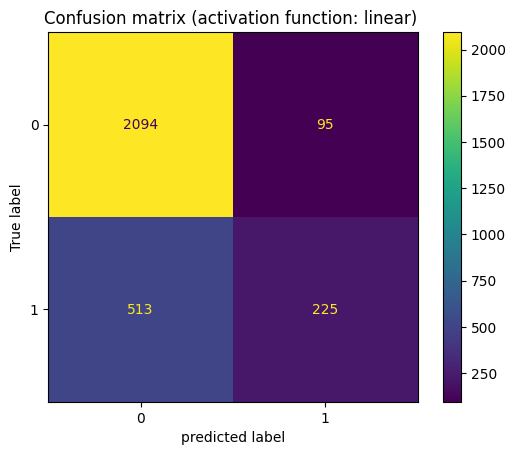

In [59]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.title("Confusion matrix (activation function: linear) ")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

precision and recall

In [62]:
# precision=TP/(TP+FP)
# recall = TP/(TP+FN)

precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
recall = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

print('precision_score: ', precision)
print('recall_score: ', recall)

precision_score:  0.9566011877569667
recall_score:  0.8032220943613348


In [63]:
from sklearn.metrics import precision_score, recall_score

print('precision_score: ', precision_score(Y_test, Y_pred))
print('recall_score: ', recall_score(Y_test, Y_pred))

precision_score:  0.703125
recall_score:  0.3048780487804878
